/Users/joergstihler/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:31: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.


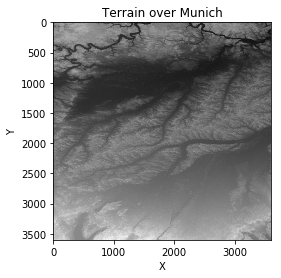

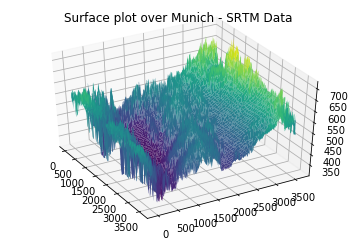

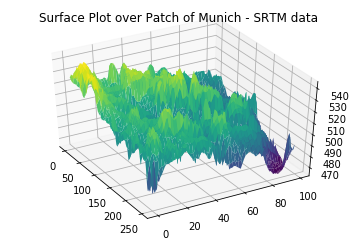

In [2]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
from matplotlib import cm 
from matplotlib.ticker import LinearLocator, FormatStrFormatter
import numpy as np 
from random import random, seed
from sklearn.linear_model import LinearRegression
from scipy.misc import imread
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from random import random, seed


def surface_plot(surface,title):
    M,N = surface.shape

    ax_rows = np.arange(M)
    ax_cols = np.arange(N)

    [X,Y] = np.meshgrid(ax_cols, ax_rows)

    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(elev=40,azim=-30)
    ax.plot_surface(X,Y,surface,cmap=cm.viridis,linewidth=0)
    plt.title(title)

if __name__ == '__main__':

    # Load the terrain
    terrain1 = imread('SRTM_data_munich.tif')

    # Show the terrain
    plt.figure()
    plt.title('Terrain over Munich')
    plt.imshow(terrain1, cmap='gray')
    plt.xlabel('X')
    plt.ylabel('Y')

    surface_plot(terrain1,'Surface plot over Munich - SRTM Data')
   
    
    plt.show()

    # Extract a smaller patch of the terrain
    row_start = 1950
    row_end = 2050

    col_start = 1200
    col_end = 1450

    terrain1_patch = terrain1[row_start:row_end, col_start:col_end]

    surface_plot(terrain1_patch,'Surface Plot over Patch of Munich - SRTM data')
    

    plt.show()

    # Perform a OLS fitting using the whole axis pf the terrain data
    num_rows, num_cols = terrain1_patch.shape

    rows = np.arange(num_rows)
    cols = np.arange(num_cols)

    [C,R] = np.meshgrid(cols,rows)

    x = C.reshape(-1,1)
    y = R.reshape(-1,1)
    z = terrain1_patch.flatten()


    

In [3]:
#import packages from scikit learn for lasso regression
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import random
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [24]:
# create design matrix
xy=np.c_[x,y]
poly5 = PolynomialFeatures(degree=5)
XY = poly5.fit_transform(xy)

# find penalty with sklearn cross validation
lassocv=linear_model.LassoCV(max_iter=50000)
lassocv.fit(XY,z)

alpha=1e-4

#to use the alpha chosen by scikit-learn, change alpha to lassocv.alpha_
#alpha=lassocv.alpha_

print('alpha chosen by sklearn : ',lassocv.alpha_)
print('alpha chosen manually   : ', alpha)

# perform lasso regression with sklearn
lasso5=linear_model.Lasso(alpha,max_iter=50000)
lasso5.fit(XY,z)
zpredictlasso=lasso5.predict(XY)

# lasso coefficients
betalasso=lasso5.coef_
betalasso[0]=lasso5.intercept_

np.set_printoptions(precision=6)
np.set_printoptions(suppress=True)
print('Lasso coefficients')
print(np.c_[np.arange(1,22),betalasso])

alpha chosen by sklearn :  1524514479.1798167
alpha chosen manually   :  0.0001
Lasso coefficients
[[  1.       534.822469]
 [  2.         0.104846]
 [  3.        -1.105952]
 [  4.        -0.005344]
 [  5.         0.005226]
 [  6.         0.019349]
 [  7.         0.000025]
 [  8.         0.000031]
 [  9.        -0.000198]
 [ 10.         0.000054]
 [ 11.         0.      ]
 [ 12.        -0.      ]
 [ 13.         0.      ]
 [ 14.         0.000004]
 [ 15.        -0.000006]
 [ 16.        -0.      ]
 [ 17.         0.      ]
 [ 18.        -0.      ]
 [ 19.         0.      ]
 [ 20.        -0.      ]
 [ 21.         0.      ]]


/Users/joergstihler/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


In [25]:
R2scotestsk = r2_score(z,zpredictlasso)
MSEtestsk = sklearn.metrics.mean_squared_error(z,zpredictlasso)

print('MSE  :', MSEtestsk)
print('R2   :',R2scotestsk)



MSE  : 67.86266372658116
R2   : 0.6166739315953342


In [26]:
# k-crossvalidation, we choose k =10, that means we get 10 partitions
k=10

import random
#generating random partitions of our data 

#generating random order of data points
for j in range(0,len(z)):
    switchindex = random.choice(range(0,len(z)))
    switchvalueX = x[j]
    switchvalueY = y[j]
    switchvalueZ = z[j]
    x[j] =x[switchindex]
    y[j] =y[switchindex]
    z[j] =z[switchindex]
    x[switchindex] =switchvalueX
    y[switchindex] =switchvalueY
    z[switchindex] =switchvalueZ

    
partitionsize = int(len(z)/k)
index = 0
#alphav=np.array([1e-5,1e-4,1e-3,1e-2])
#lengtha=len(alphav)
resultmatrixMSE=np.empty(k)
resultmatrixR2=np.empty(k)
poly5 = PolynomialFeatures(degree=5)

mean_MSE_R2 = np.c_[(np.array(range(2,6))),np.zeros(4),np.zeros(4)]     #Matrix containing average MSE & R2 per degree
#making sure there are zeros in the matrix
for j in range(0,4):
    mean_MSE_R2[j][1]=0
    mean_MSE_R2[j][2]=0


partitionnumber = 1
for k in range(1,k+1):
    print('Partition ',partitionnumber)
    print()
    testx = x[index:index+partitionsize]                                #testdata
    testy = y[index:index+partitionsize]
    testz = z[index:index+partitionsize]
    trainingx =  np.concatenate((x[:index],x[index+partitionsize:]))    #trainingdata
    trainingy =  np.concatenate((y[:index],y[index+partitionsize:]))
    trainingz =  np.concatenate((z[:index],z[index+partitionsize:]))

    
    degree = 5
    print(' degree ',degree)
        
    # create design matrix
    xy_train=np.c_[trainingx,trainingy]
    xy_test=np.c_[testx,testy]
    XY_train = poly5.fit_transform(xy_train)
    XY_test = poly5.fit_transform(xy_test)

    # find penalty with sklearn cross validation
    lassocv=linear_model.LassoCV(max_iter=50000)
    lassocv.fit(XY_train,trainingz)
    alpha=lassocv.alpha_
    print('alpha= ',lassocv.alpha_)

    # perform lasso regression with sklearn
    lasso5=linear_model.Lasso(alpha,max_iter=50000)
    lasso5.fit(XY_train,trainingz)
    zpredictlassocv=lasso5.predict(XY_test)                               #predicting values for the testset

        
    
    MSEtest = mean_squared_error(testz,zpredictlassocv)                                       #comparing predicted and real value
    R2scotest = r2_score(testz,zpredictlassocv)
        
    print('   MSE   : ',MSEtest)
    print('   R2    : ',R2scotest)
        
    resultmatrixMSE[k-1]=MSEtest
    resultmatrixR2[k-1]=R2scotest
        
    print()
    index = index+partitionsize
    partitionnumber += 1
    
    
print('----------------------------------------------------------------')
print()



Partition  1

 degree  5
alpha=  315936233.8810574
   MSE   :  161.291140143514
   R2    :  0.046823251162537605

Partition  2

 degree  5
alpha=  316440017.46262866
   MSE   :  153.1241564250098
   R2    :  0.04329969365167308

Partition  3

 degree  5
alpha=  322876768.8389122
   MSE   :  165.4803712655765
   R2    :  0.06026297508299561

Partition  4

 degree  5
alpha=  305957629.05929506
   MSE   :  163.07332995819425
   R2    :  0.045384124279526095

Partition  5

 degree  5
alpha=  308347352.85384077
   MSE   :  163.07884528681416
   R2    :  0.0794973591709055

Partition  6

 degree  5
alpha=  300432333.661512
   MSE   :  166.87840381129232
   R2    :  0.05870634405513708

Partition  7

 degree  5
alpha=  318858143.12983537
   MSE   :  164.3414784481341
   R2    :  0.056897220788282965

Partition  8

 degree  5
alpha=  306362299.4049662
   MSE   :  170.69619059086847
   R2    :  0.04289516829436546

Partition  9

 degree  5
alpha=  297602664.07630783
   MSE   :  178.636261929325

In [31]:
m=np.mean(resultmatrixMSE)
n=np.mean(resultmatrixR2)
print('MSE average    :', np.mean(resultmatrixMSE))
print('R2  average     :',np.mean(resultmatrixR2))

[161.29114  153.124156 165.480371 163.07333  163.078845 166.878404
 164.341478 170.696191 178.636262 177.178073]
MSE average    : 166.3778251129988
R2  average     : 0.057050974166053


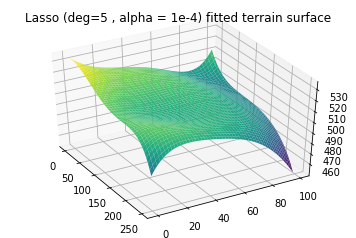

In [29]:
    beta_ls=betalasso
    fitted_terrain = np.zeros((num_rows, num_cols))
    for i in range(num_rows):
        y_ = rows[i]
        for j in range(num_cols):
            x_ = cols[j]

            data_vec = np.array([1, x_, y_, x_**2,x_*y_,y_**2 ,  \
                                x_**3, x_**2*y_, x_*y_**2, y_**3, \
                                x_**4, x_**3*y_,x_**2*y_**2, x_*y_**3,y_**4,   \
                                x_**5, x_**4*y_ ,x_**3*y_**2,x_**2*y_**3,x_*y_**4 ,y_**5])# \
                                #x_**6, x_**5*y_, x_**4*y_**2, x_**3*y_**3,x_**2*y_**4,x_*y_**5,y_**6, \
                                #x_**7, x_**6*y_, x_**5*y_**2, x_**4*y_**3,x_**3*y_**4,x_**2*y_**5,x_*y_**6,y_**7, \
                                #x_**8, x_**7*y_, x_**6*y_**2, x_**5*y_**3,x_**4*y_**4,x_**3*y_**5,x_**2*y_**6,x_*y_**7,y_**8, \
                                #x_**9, x_**8*y_, x_**7*y_**2, x_**6*y_**3,x_**5*y_**4,x_**4*y_**5,x_**3*y_**6,x_**2*y_**7,x_*y_**8,y_**9])
            fitted_terrain[i,j] = data_vec @ beta_ls
            

    surface_plot(fitted_terrain,'Lasso (deg=5 , alpha = 1e-4) fitted terrain surface')

    plt.show()